<a href="https://colab.research.google.com/github/ImmanuelDeo/541211089-XIIRPL3-ImmanuelDeo/blob/main/EVALUASI_1_PORTUGAL_HOUSING_SAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

In [4]:
housingdf = pd.read_csv('https://raw.githubusercontent.com/suxeno/StudyDateAI-Week1-Evaluation-Dataset/refs/heads/main/portugal-housing-sample.csv')

In [ ]:
housingdf.head()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,55000.0,Coimbra,Figueira da Foz,Alqueidão,Land,NC,NaN,False,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,NaN,NaN,0.0
1,289000.0,Setúbal,Montijo,Canha,House,D,NaN,False,2.0,True,...,NaN,NaN,4.0,NaN,NaN,NaN,156.0,NaN,NaN,4.0
2,46500.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,2880.0,NaN,0.0
3,203000.0,Porto,Vila Nova de Gaia,Vilar de Andorinho,Apartment,E,3rd Floor,True,1.0,True,...,NaN,NaN,2.0,NaN,NaN,NaN,92.0,NaN,NaN,2.0
4,72500.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,1954.0,NaN,0.0


In [ ]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              20000 non-null  float64
 1   District           20000 non-null  int64  
 2   City               20000 non-null  int64  
 3   Town               20000 non-null  int64  
 4   Type               20000 non-null  int64  
 5   Parking            20000 non-null  float64
 6   HasParking         20000 non-null  int64  
 7   ConstructionYear   20000 non-null  float64
 8   TotalArea          20000 non-null  float64
 9   TotalRooms         20000 non-null  float64
 10  LivingArea         20000 non-null  float64
 11  NumberOfBathrooms  20000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.8 MB


**EDA & PREPROCESSING**

In [ ]:
data_karakter = housingdf.select_dtypes(include=['object'])
data_karakter.columns

Index([], dtype='object')

In [ ]:
data_numerik = housingdf.select_dtypes(include=['int64', 'float'])
data_numerik.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'Parking', 'HasParking',
       'ConstructionYear', 'TotalArea', 'TotalRooms', 'LivingArea',
       'NumberOfBathrooms'],
      dtype='object')

**CLEANSING DATA:**

In [ ]:
housingdf.isna().sum()

,0
Price,0
District,0
City,0
Town,0
Type,0
Parking,0
HasParking,0
ConstructionYear,0
TotalArea,0
TotalRooms,0


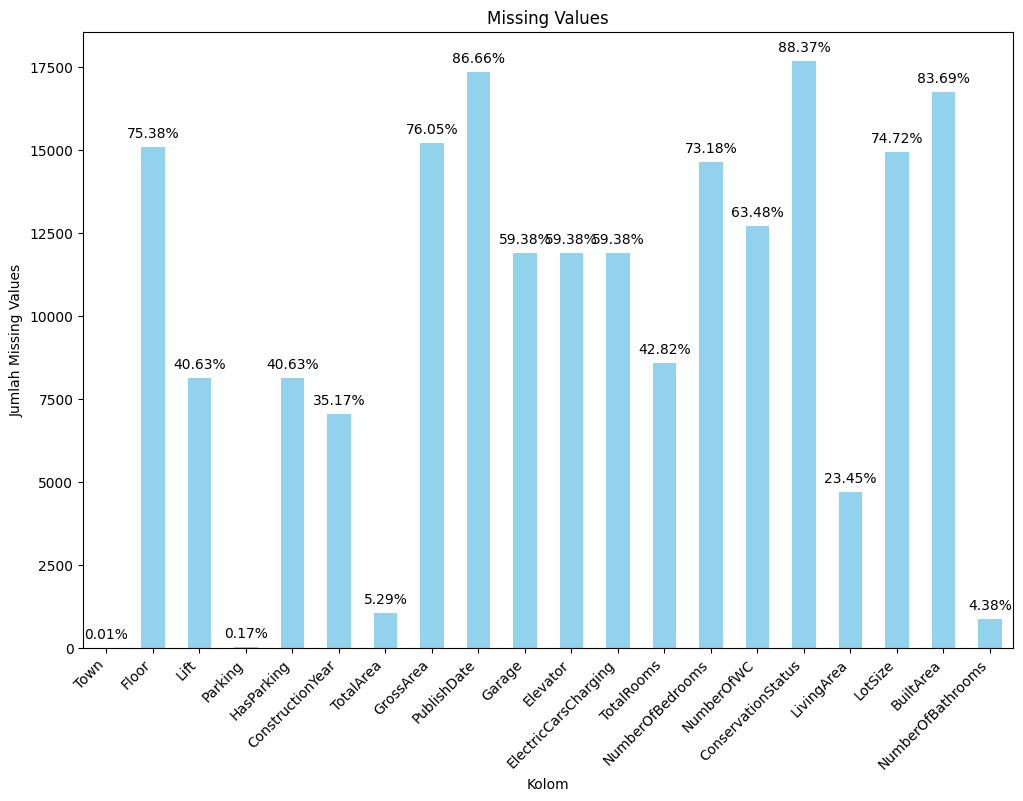

In [ ]:
import matplotlib.pyplot as plt

rows_length = housingdf.shape[0]
fields_with_nan_length = housingdf.isna().sum().where(lambda x: x > 0).dropna()

plt.figure(figsize=(12, 8))

ax = fields_with_nan_length.plot(
    kind='bar', alpha=0.9, color='skyblue', title='Missing Values', rot=45
)

for i in ax.patches:
    ax.text(
        i.get_x() + i.get_width() / 2, i.get_height() + rows_length * 0.01,
        f"{(i.get_height() / rows_length * 100):.2f}%", ha='center', va='bottom'
    )

ax.set_ylabel('Jumlah Missing Values')
ax.set_xlabel('Kolom')

plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
housingdf=housingdf.drop(columns=['Floor', 'Lift', 'GrossArea', 'PublishDate', 'Garage', 'Elevator', 'ElectricCarsCharging',
                        'NumberOfWC', 'ConservationStatus', 'BuiltArea', 'LotSize', 'EnergyCertificate', 'NumberOfBedrooms'], axis=1)
housingdf.head()

,Price,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
0,55000.0,Coimbra,Figueira da Foz,Alqueidão,Land,0.0,False,NaN,1287.0,NaN,1287.0,0.0
1,289000.0,Setúbal,Montijo,Canha,House,2.0,True,1986.0,306.0,4.0,156.0,4.0
2,46500.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,203000.0,Porto,Vila Nova de Gaia,Vilar de Andorinho,Apartment,1.0,True,1996.0,118.0,2.0,92.0,2.0
4,72500.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Land,0.0,NaN,NaN,1954.0,NaN,NaN,0.0


Coba isi nan value yang numerik dulu, baru nanti encode yang teks baru diisi lagi yang nan setelah di encode

In [ ]:
#Ngubah kolom kategorik jadi numerik
encoder = LabelEncoder()
categorical_columns = housingdf.select_dtypes(include=['object']).columns
for col in categorical_columns:
    housingdf[col] = encoder.fit_transform(housingdf[col])

In [ ]:
#Impute/ngisi nilai NaN dulu
numeric_data = housingdf.select_dtypes(include=['float64','int64'])
null_columns = numeric_data.columns[numeric_data.isna().any()].tolist()

imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=20, random_state=0)
housingdf[null_columns] = imputer.fit_transform(housingdf[null_columns])

housingdf[housingdf.columns] = housingdf

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
housingdf.describe()

,Price,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
count,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000
mean,3.604319e+05,11.537400,133.462000,897.60720,6.044900,0.581833,1.080600,1988.719756,2.369638e+04,2.729534,6.790177e+03,1.472665
std,6.820353e+05,6.298014,73.563314,537.66063,5.250292,0.883413,0.851786,23.825535,1.301485e+06,19.619315,6.244351e+04,1.719577
min,1.000000e+02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1900.000000,-2.350000e+02,0.000000,0.000000e+00,-13.000000
25%,7.950000e+04,5.000000,73.000000,418.00000,0.000000,0.000000,0.000000,1975.827500,9.800000e+01,0.660000,8.900000e+01,0.000000
50%,2.000000e+05,14.000000,120.000000,902.00000,7.000000,0.000000,1.000000,1991.570000,1.960000e+02,2.273417,1.500000e+02,1.000000
75%,3.900000e+05,16.000000,204.000000,1370.25000,10.000000,1.000000,2.000000,2005.000000,8.750000e+02,3.771250,4.232175e+02,2.000000
max,3.600000e+07,23.000000,263.000000,1869.00000,20.000000,3.000000,2.000000,2024.000000,1.656206e+08,2751.000000,5.429000e+06,61.000000


**VISUALISASI DATA:**

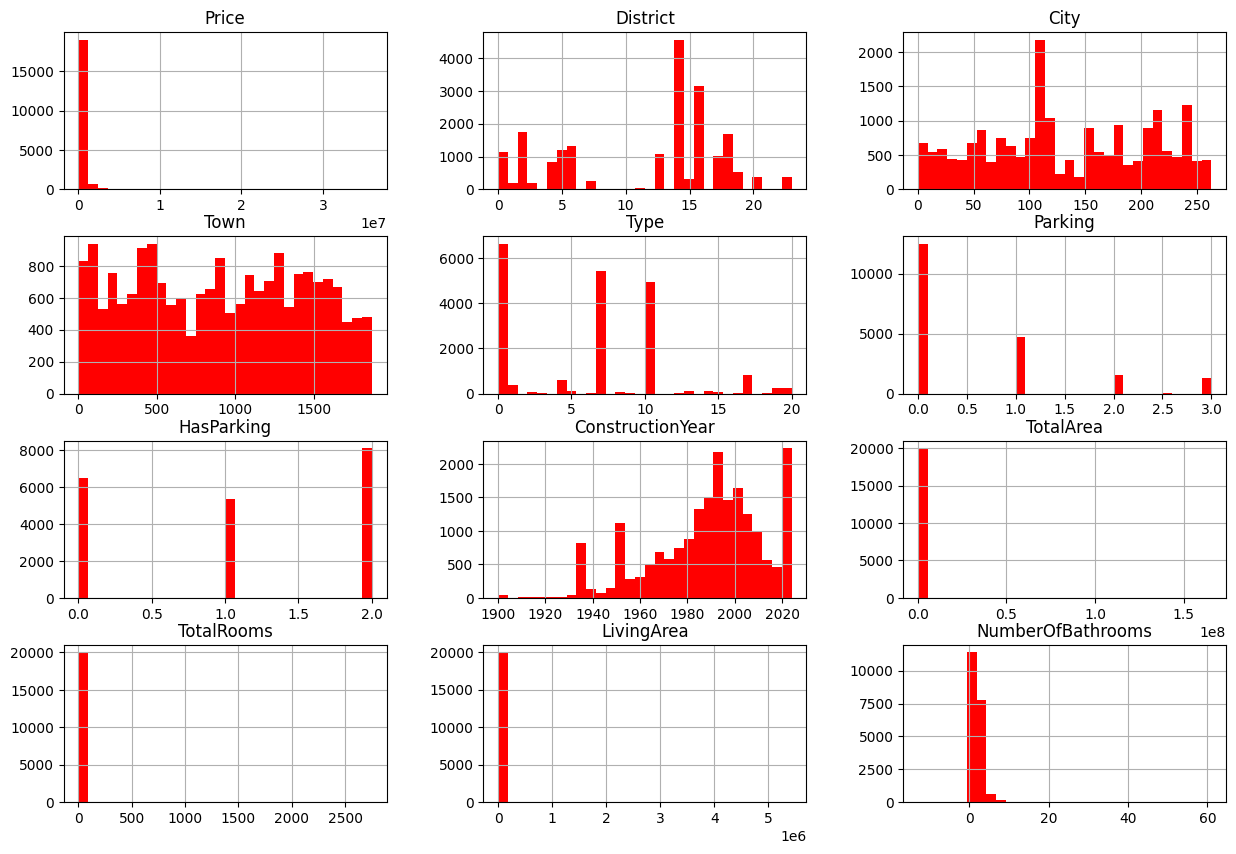

In [ ]:
# Histogram
housingdf.hist(figsize=(15, 10), bins=30,color='red');

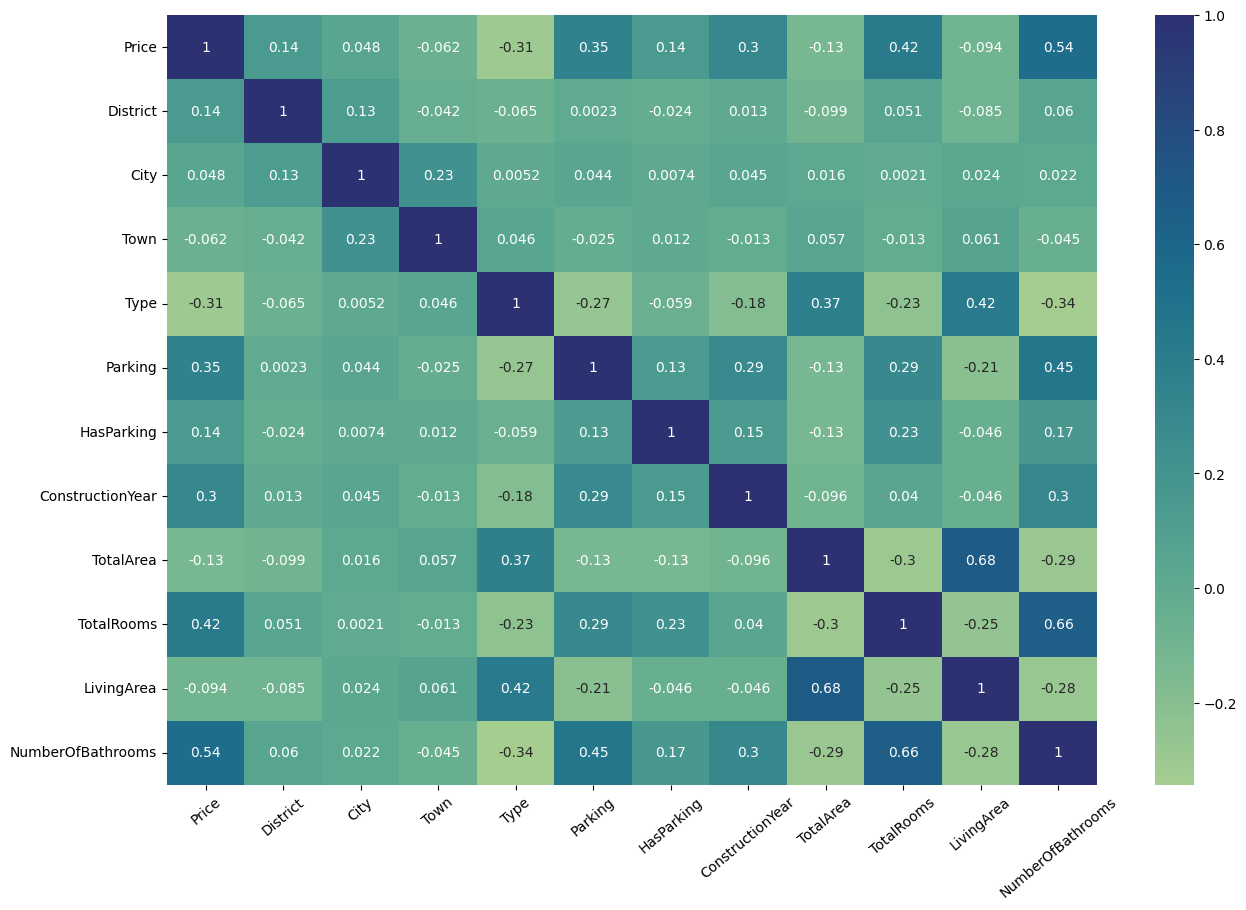

In [ ]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_numerik.corr(), annot=True, cmap='crest')
plt.xticks(rotation=40)
plt.show()

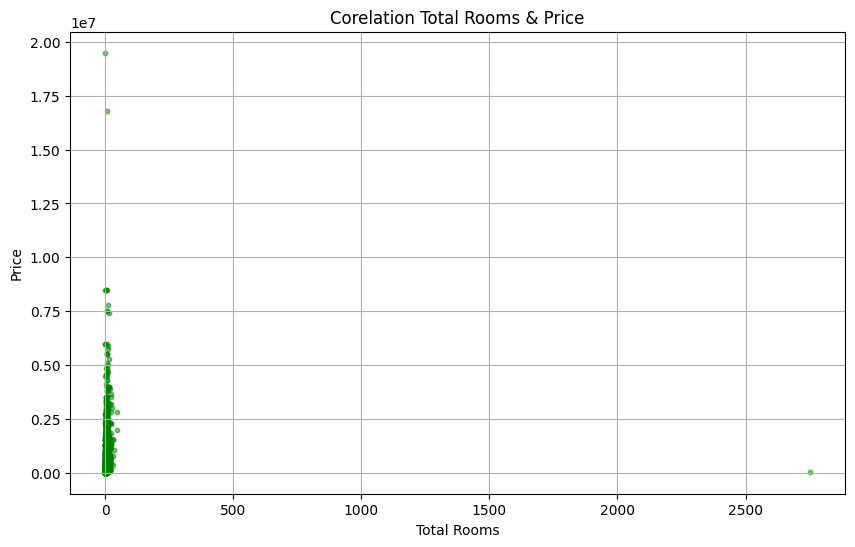

In [6]:
# ScatterPlot
plt.figure(figsize=(10, 6))
plt.scatter(x=housingdf['TotalRooms'], y=housingdf['Price'], color='green', alpha=0.5, s=10)
plt.title('Corelation Total Rooms & Price')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

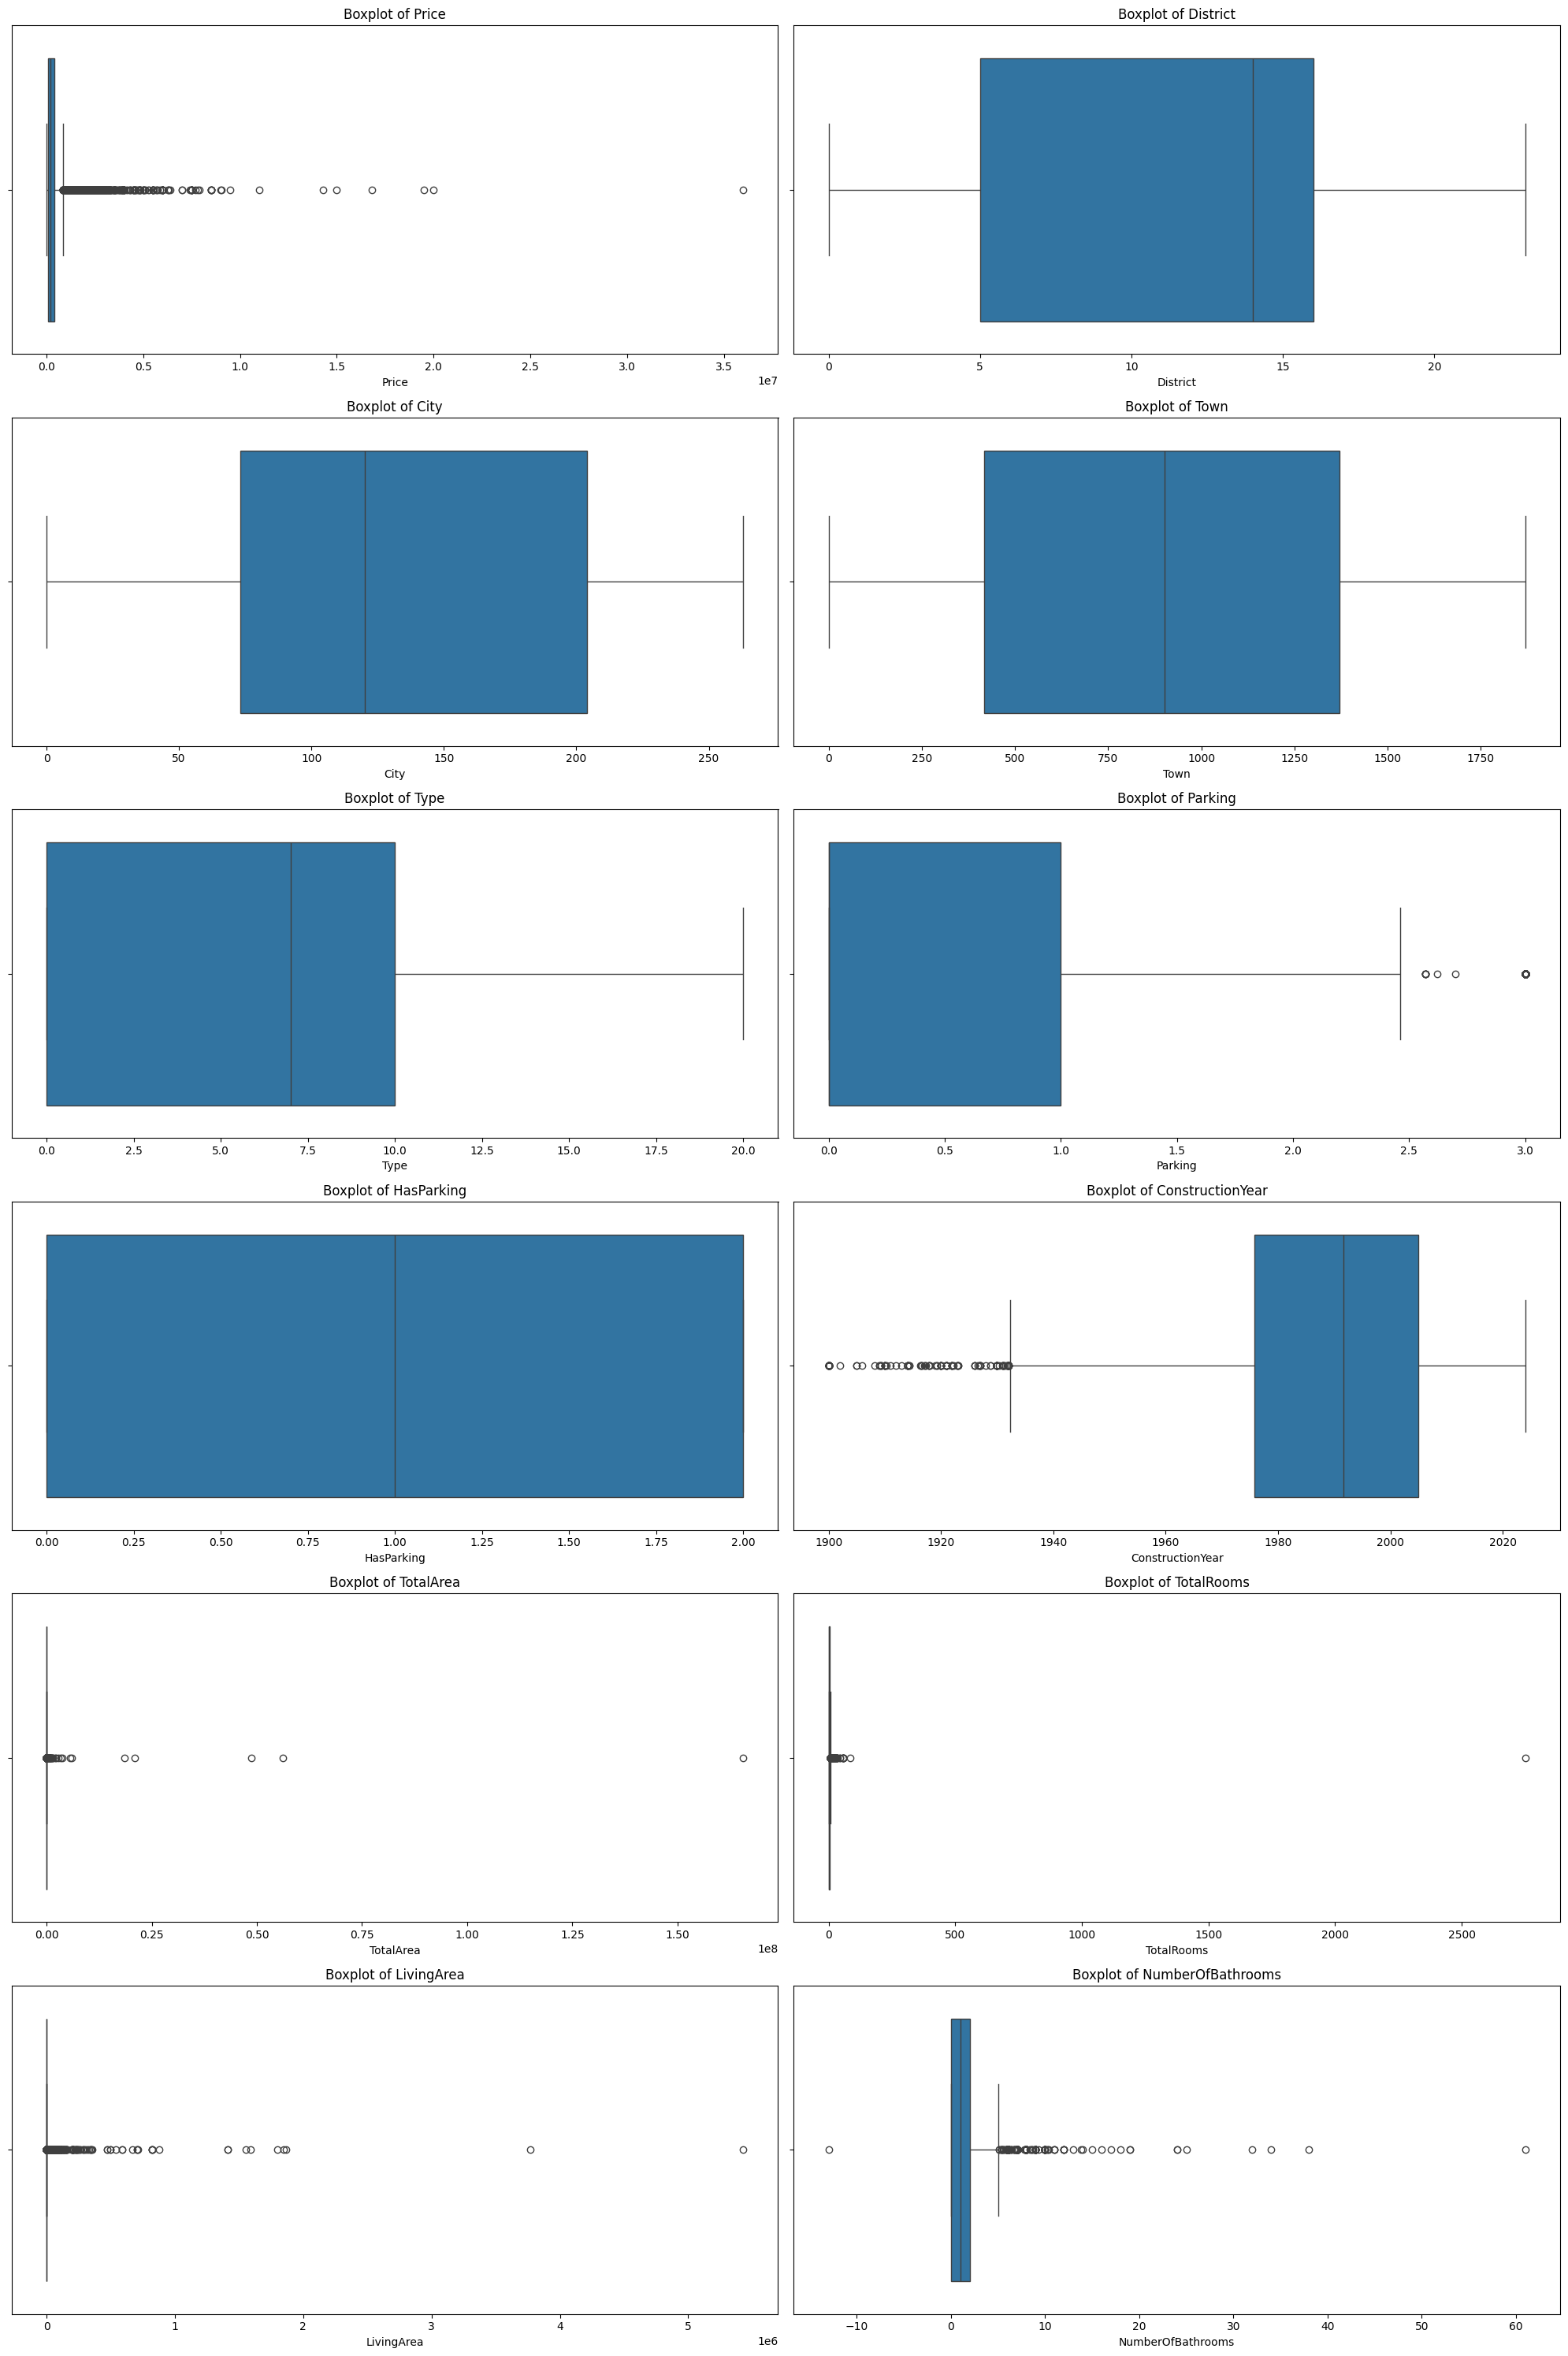

In [ ]:
#Ini visual boxplot ges
# Dapet numeric columns dari DataFrame
numeric_cols = housingdf.select_dtypes(exclude='object').columns

# Calculate the number of rows and columns required for subplots
num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=housingdf[col], ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")

# Hide any unused axes
for i in range(num_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**OUTLIERS HANDLING:**

In [ ]:
# Menangani data outlier dengan mengubah nilai outlier ke nilai kuartil terdekat(Kuartil 1 dan Kuartil 3).

# Menangani data outlier hanya pada kolom numerik
def iqr_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[col] = data[col].mask(data[col] < lower_bound, Q1)
    data[col] = data[col].mask(data[col] > upper_bound, Q3)
    return data

for col in housingdf.select_dtypes(include=['float64', 'int64']).columns:
    iqr_outliers(housingdf, col)


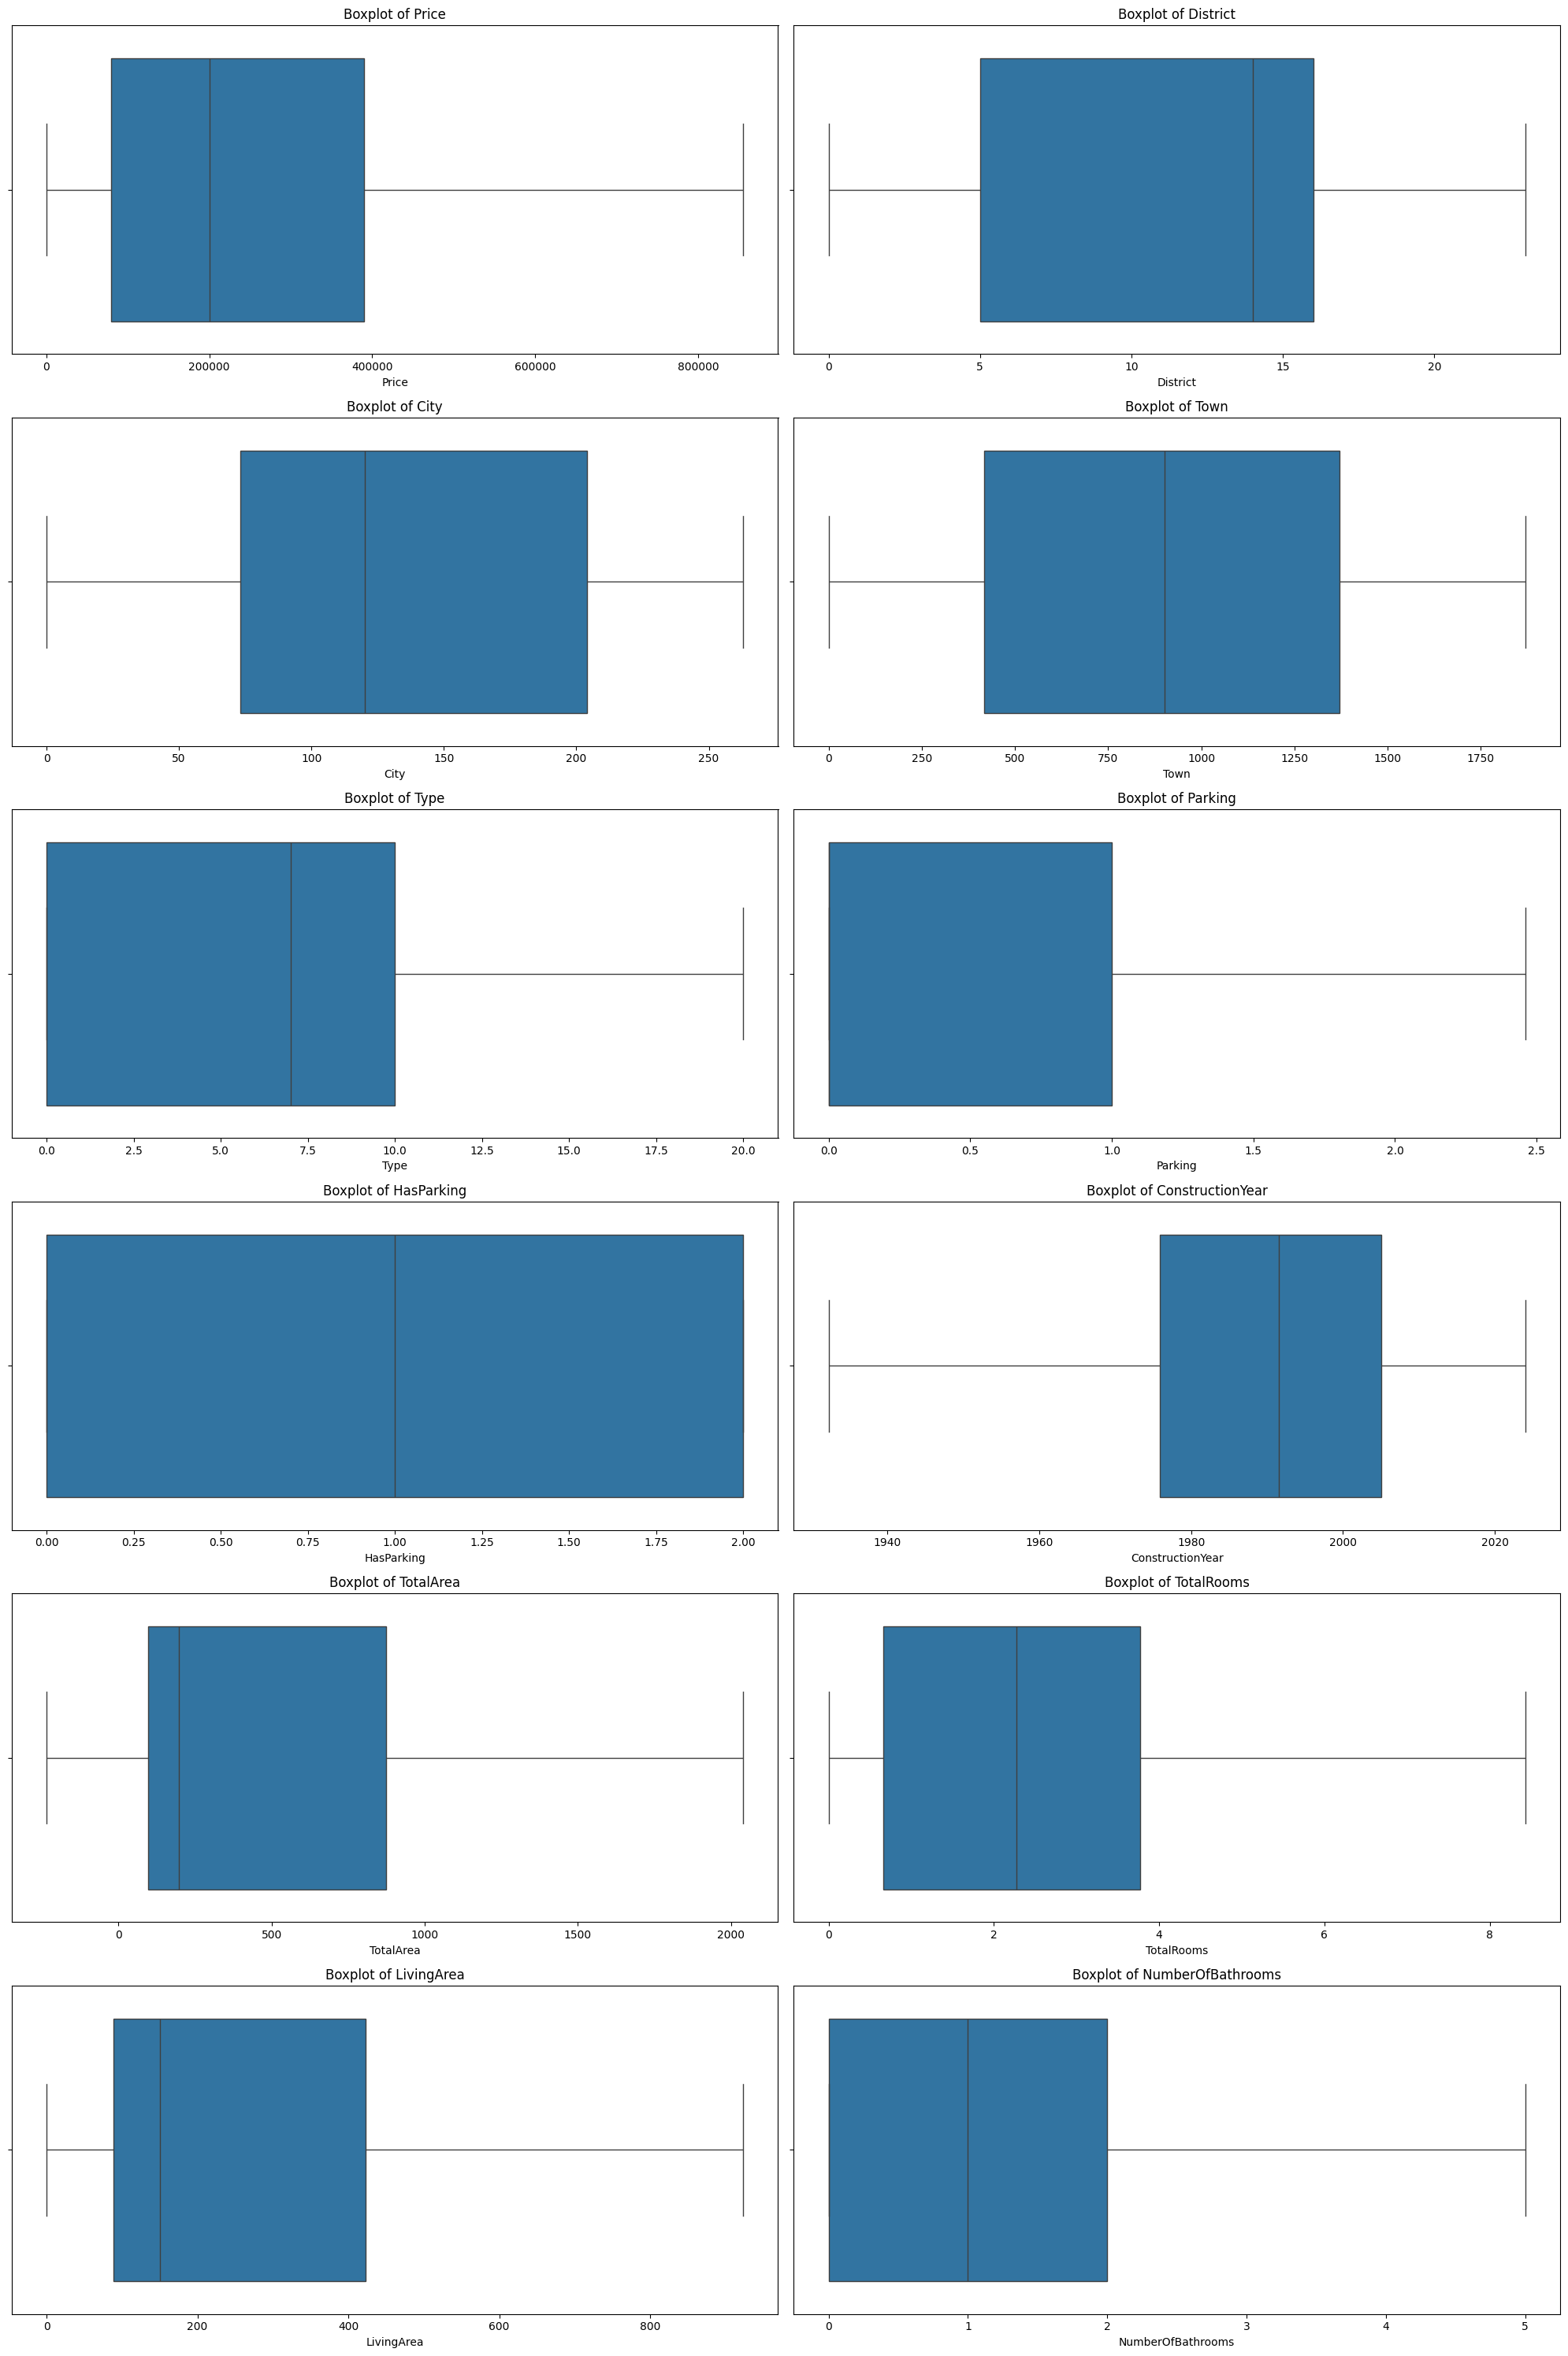

In [ ]:
numeric_cols = housingdf.select_dtypes(exclude='object').columns

num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=housingdf[col], ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")

for i in range(num_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**NORMALIZATION AND SCALLING FOR MODEL:**

In [ ]:
# membagi data fitur dan data target
x = housingdf.drop(columns=['Price'])
y = housingdf['Price']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

#Output
x_scaled.head()

,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
0,0.217391,0.338403,0.056715,0.50,0.000000,0.0,0.709941,0.669011,0.003559,0.458256,0.0
1,0.782609,0.528517,0.210273,0.35,0.813008,0.5,0.585786,0.237802,0.474496,0.168915,0.8
2,0.608696,0.429658,0.459604,0.50,0.000000,1.0,0.646501,0.487912,0.000000,0.458256,0.0
3,0.695652,0.931559,0.976458,0.00,0.406504,0.5,0.694790,0.155165,0.237248,0.099617,0.4
4,0.086957,0.197719,0.688604,0.50,0.000000,1.0,0.524907,0.962198,0.000000,0.458256,0.0


array([[<Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Town'}>],
       [<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'HasParking'}>],
       [<Axes: title={'center': 'ConstructionYear'}>,
        <Axes: title={'center': 'TotalArea'}>,
        <Axes: title={'center': 'TotalRooms'}>],
       [<Axes: title={'center': 'LivingArea'}>,
        <Axes: title={'center': 'NumberOfBathrooms'}>, <Axes: >]],
      dtype=object)

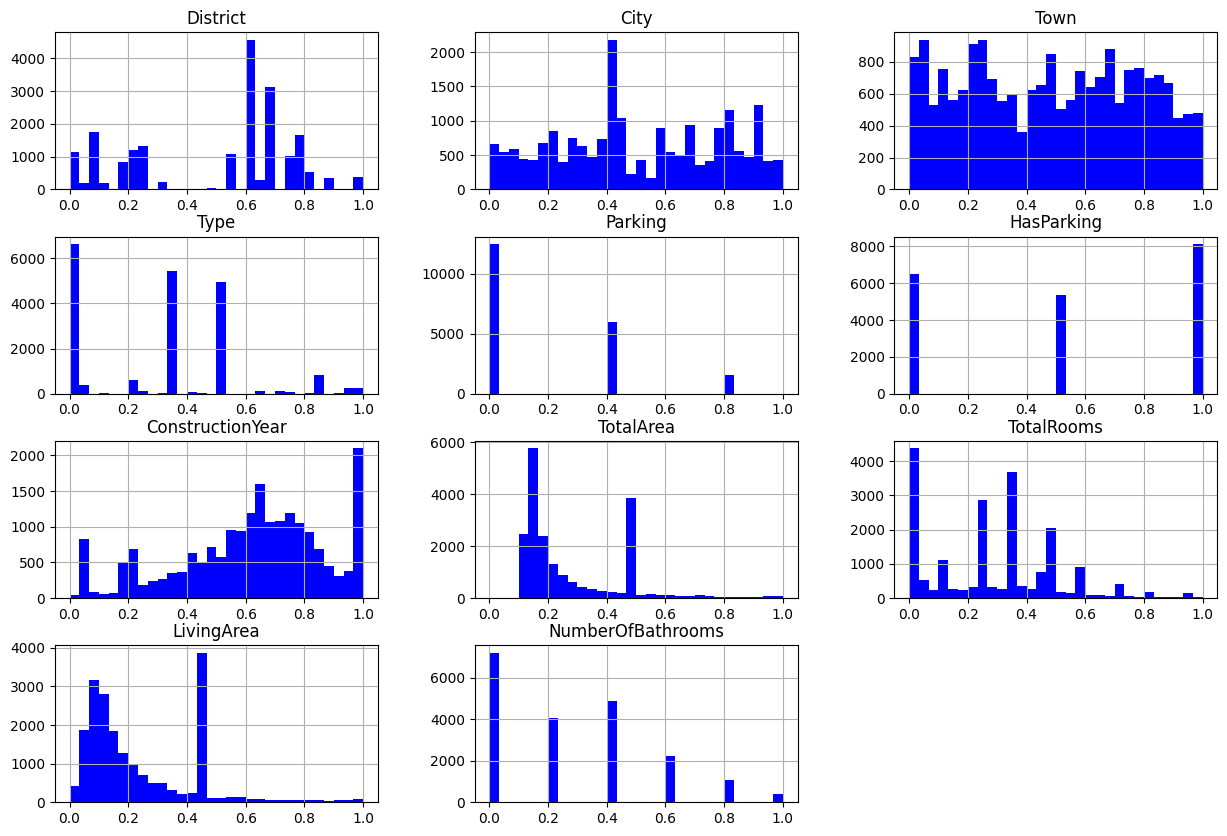

In [ ]:
#New Histogram
x_scaled.hist(figsize=(15, 10), bins=30,color='blue')

**TRAINING AND SPLITTING:**

In [ ]:
#Train declaration
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,
                                                    random_state=42)

# proporsi pembagian data training
print(x_train.shape)
print(x_train.shape[0]/len(housingdf)*100, '%')

# proporsi pembagian data test
print(x_test.shape)
print(x_test.shape[0]/len(housingdf)*100, '%')

(16000, 11)
80.0 %
(4000, 11)
20.0 %


In [ ]:
#Cek data training di x
x_train.head()

,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
5894,0.086957,0.186312,0.166934,0.00,0.000000,0.0,0.814694,0.144176,0.355872,0.100699,0.0
3728,0.826087,0.878327,0.924559,0.50,0.000000,0.0,0.474902,0.487912,0.000000,0.458256,0.0
8958,0.608696,0.809886,0.836811,0.50,0.000000,0.0,0.824395,0.487912,0.000000,0.458256,0.0
7671,0.608696,0.418251,0.578919,0.00,0.000000,1.0,0.989100,0.149011,0.293001,0.105031,0.4
5999,0.608696,0.855513,0.000000,0.35,0.406504,0.5,0.814694,0.274725,0.711744,0.362735,0.4


In [ ]:
#Cek data training di y
y_train.head()

,Price
5894,425000.0
3728,90000.0
8958,20000.0
7671,520000.0
5999,675000.0


**K-FOLD CROSS VALDIATION FOR REGRESSION MODEL**

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)

#Linear Regression
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression MSE:", np.mean(-scores))

#Ridge Regression
model = Ridge(alpha=1.0)
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Ridge Regression MSE:", np.mean(-scores))

#Lasso Regression
model = Lasso(alpha=1.0)
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
print("Lasso Regression MSE:", np.mean(-scores))


Linear Regression MSE: 22756959458.342243
Ridge Regression MSE: 22756944870.7268
Lasso Regression MSE: 22756959397.216717


**USING RIDGE REGRESSION MODEL:**

In [ ]:
model_ridge = Ridge(alpha=0.5)

# melatih model dengan data training
model_ridge.fit(x_train, y_train)

# menguji model dengan memprediksi data test
y_pred_rd = model_ridge.predict(x_test)

model_ridge.intercept_

22967.436755400617

In [ ]:
ridge_coef = pd.DataFrame({'Columns':x.columns, 'Coefficient':model_ridge.coef_})
ridge_coef

,Columns,Coefficient
0,District,77638.391841
1,City,12141.186174
2,Town,-31664.454927
3,Type,-122520.328446
4,Parking,79840.270049
5,HasParking,9027.974050
6,ConstructionYear,104076.369807
7,TotalArea,30732.894200
8,TotalRooms,138768.117132
9,LivingArea,134285.055313


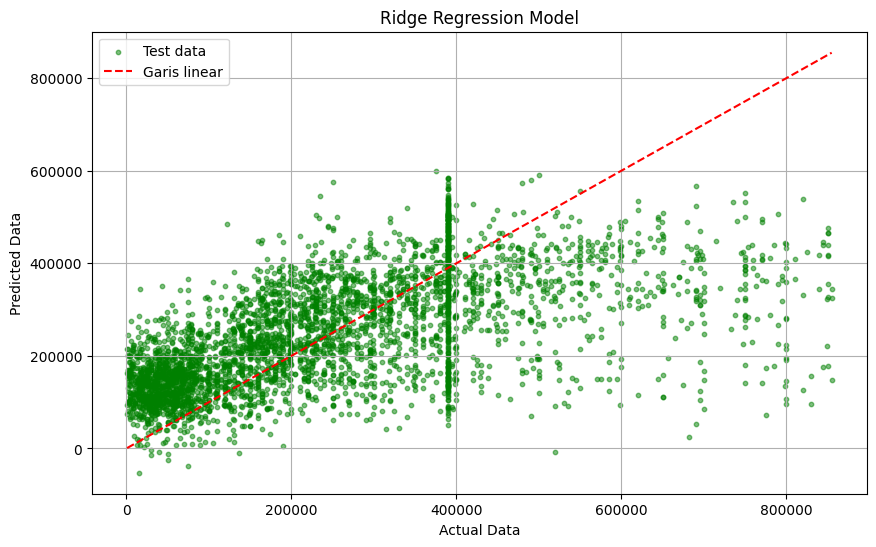

In [ ]:
# visualisasi scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rd, color='green', label='Test data', alpha=0.5, s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis linear', linestyle= '--')
plt.title('Ridge Regression Model')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# evaluasi model
mae_ridge = mean_absolute_error(y_test, y_pred_rd)
mse_ridge = mean_squared_error(y_test, y_pred_rd)
rms_ridge = root_mean_squared_error(y_test, y_pred_rd)
r2_ridge = r2_score(y_test, y_pred_rd)

print('mean absolute error:', mae_ridge)
print('mean squared error:', mse_ridge)
print('root mean squared error:', rms_ridge)
print('r2 score:', r2_ridge)

mean absolute error: 111356.22852315879
mean squared error: 22336269537.38171
root mean squared error: 149453.23528576325
r2 score: 0.3676520873376109
